In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [20]:
#Load the Dataset
data = pd.read_csv('customer_data_records.csv')
#Display the first few rows of the dataset
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [21]:
#Extarct the relevant features for clustering
X = data.iloc[:, [1, 2]].values # Select columns 1 and 2 as Annual Income and Spending Score for all rows
print(X)

[[117  20]
 [107  59]
 [ 29  36]
 [121  19]
 [ 86  90]
 [ 35  67]
 [117  19]
 [136  20]
 [ 89  96]
 [102  71]
 [131  52]
 [114  33]
 [118  40]
 [145  39]
 [ 67  82]
 [ 16   1]
 [102  11]
 [ 52  92]
 [144  57]
 [ 35  89]
 [ 72  50]
 [ 36  23]
 [103  31]
 [ 63  94]
 [ 73  42]
 [ 29  99]
 [ 65   7]
 [122  16]
 [ 69  90]
 [ 78  60]
 [145   2]
 [ 65   1]
 [149  48]
 [ 35  12]
 [ 87  69]
 [ 32  37]
 [146  32]
 [103   9]
 [ 74  99]
 [ 28  19]
 [ 23  48]
 [104  80]
 [ 67   3]
 [144  20]
 [ 98  24]
 [106  54]
 [125  33]
 [ 22  24]
 [ 49  75]
 [ 95  72]
 [ 64  36]
 [118  38]
 [146  84]
 [ 16  99]
 [148  89]
 [ 68  99]
 [120  25]
 [ 18  93]
 [ 68  18]
 [ 58  82]
 [ 28  66]
 [109  54]
 [ 62  35]
 [ 29  80]
 [ 54  61]
 [ 96  41]
 [125 100]
 [ 67  33]
 [ 38  68]
 [138  33]
 [ 55  14]
 [ 29  21]
 [ 59  48]
 [ 79  20]
 [103   8]
 [ 85   7]
 [ 23  67]
 [102  17]
 [143  33]
 [ 77  48]
 [ 95  76]
 [ 47  59]
 [137  86]
 [ 19  22]
 [ 55  30]
 [ 42  38]
 [149  51]
 [ 86  54]
 [ 26   8]
 [ 47  27]
 [ 62  27]

In [22]:
#Feature Scaling- It is important to scale features before clustering to enable creation of standard scaler objects
scaler = StandardScaler() #Create a StandarScaler Object
X_scaled = scaler.fit_transform(X) #Standardize the features to have a mean=0 and Varriance=1

In [23]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

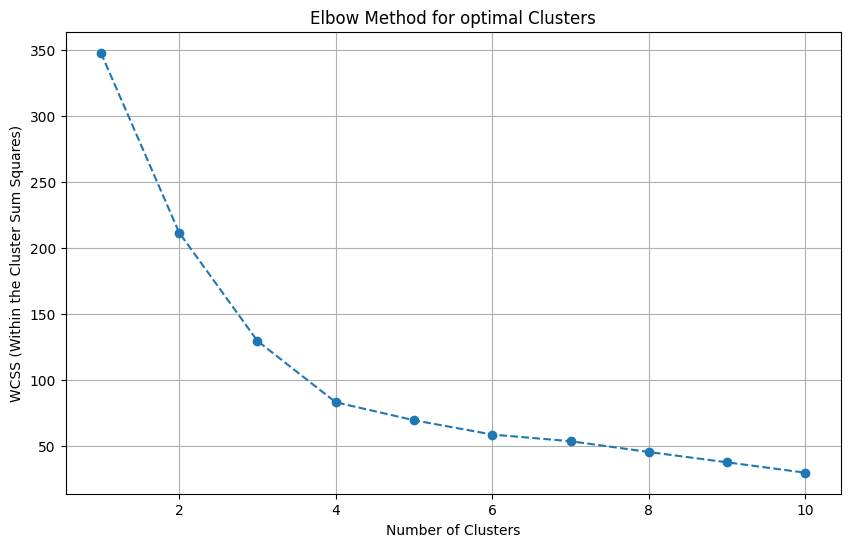

In [24]:
#Plotting of the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within the Cluster Sum Squares)')
plt.grid(True)
plt.show()

In [25]:
# Base on Elbow method, let's assume the optimal number of clusters is 5
optimal_clusters = 5
# Apply K-MEANS Clustering with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'
